<a href="https://colab.research.google.com/github/fkoerich/DescriptiveStatistics/blob/main/Estatistica_Discritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#Abre o arquivo com os dados no modo leitura
#file = open('/content/sample_data/adultos.txt','r')
import urllib

file = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

def chr_int(a):
  if a.isdigit(): return int(a) 
  else: return 0
  
data = []
for line in file:
  decoded_line = line.decode("utf-8")
  data1 = decoded_line.split(', ') 
  if len(data1) == 15:
    data.append([chr_int(data1[0]), data1[1], chr_int(data1[2]), data1[3], 
                 chr_int(data1[4]), data1[5], data1[6], data1[7], data1[8], 
                 data1[9], chr_int(data1[10]), chr_int(data1[11]), 
                 chr_int(data1[12]), data1[13], data1[14]])

In [94]:
#PRINT DATA
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [95]:
#DATA FRAME WITH PADAS, SHOW NUMBER OF ROWS
import pandas as pd

df = pd.DataFrame(data) 

#Colunas do Date Frame
df.columns = [
  'age', 'type_employer', 'fnlwgt', 'education', 'education_num', 'marital', 
  'occupation',' relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
  'hr_per_week', 'country', 'income'
]

df.shape #Mostra a quantidade de Registros

(32561, 15)

In [96]:
#Agrupa por países
counts = df.groupby('country').size() 

print(counts.head())
#Primeira linha mostra os que não tem 'country'

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [98]:
#Vai pegar do sexo Masculino
ml = df[(df.sex == 'Male')]

#Vai pegar do sexo Masculino que ganha mais que 50 mil
ml1 = df[(df.sex == 'Male') & (df.income=='>50K\n') ]

#Vai pegar do sexo Feminino
fm = df[(df.sex == 'Female')]

#Vai pegar do sexo Feminino que ganha mais que 50 mil
fm1 = df[(df.sex == 'Female') & (df.income=='>50K\n')]

#Profissinais com altos salários
df1 = df[(df.income=='>50K\n')]

#Mostra a proporção de pessoas com altos salários
print ('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.')

#Mostra a proporção de homens com altos salários
print ('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.')

#Mostra a proporção de mulhers com altos salários
print ('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.')


The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


In [99]:
#Calculo das Médias

#Média de idade dos homens
print ('The average age of men is: ', ml['age'].mean())

#Média de idade das mulheres
print ('The average age of women is: ', fm['age'].mean())

#Média de idade dos homens que ganham altos saláários
print ('The average age of high-income men is: ', ml1['age'].mean())

#Média de idade das mulhers que ganham altos saláários
print ('The average age of high-income women is: ', fm1['age'].mean())


The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average age of high-income men is:  44.62578805163614
The average age of high-income women is:  42.125530110262936


In [100]:
#Calculo da Variancia

#Média de idade dos homens
ml_mu = ml['age'].mean()
#Média de idade das mulheres
fm_mu = fm['age'].mean()

#Variância da idade dos homens
ml_var = ml['age'].var()
#Variância da idade das mulheres
fm_var = fm['age'].var()

#Desvio Padrão da idade dos homens
ml_std = ml['age'].std()
#Desvio Padrão da idade das mulheres
fm_std = fm['age'].std()


print ('Statistics of age for men: mu:', ml_mu, 'var:', ml_var, 'std:', ml_std )
print ('Statistics of age for women: mu:', fm_mu, 'var:', fm_var, 'std:', fm_std )

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174530096 std: 13.37063019252649
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


In [101]:
#Calculo da Mediana

#Mediana da idade dos Homens
ml_median = ml['age'].median()
#Mediana da idade dos Homens
fm_median = fm['age'].median()

print ("Median age per men and women: ", ml_median, fm_median)

#Mediana da idade dos Homens com altos salários
ml_median_age = ml1['age'].median() 
#Mediana da idade das Mulheres com altos salários
fm_median_age = fm1['age'].median()

print ("Median age per men and women with high-income: ", ml_median_age, fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


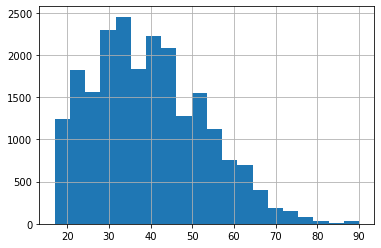

In [102]:
#Quantil e Percentil

#Histograma das idades do homem
ml_age = ml['age']
ml_age.hist(density=False, histtype = 'stepfilled', bins = 20)


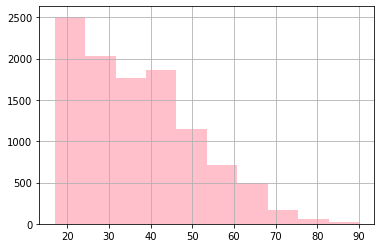

In [103]:
#Quantil e Percentil 

#Histograma das idades da mulher
fm_age = fm['age']
fm_age.hist(density=False, histtype = 'stepfilled', bins = 10, color = 'pink')

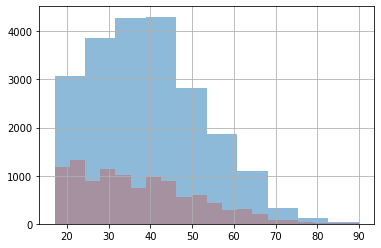

In [104]:
#Quantil e Percentil Sample
import seaborn as sns 

ml_age.hist(density=False, alpha = .5, histtype = 'stepfilled', bins = 10)

fm_age.hist(density=False, alpha = .5, histtype = 'stepfilled', bins = 20, 
            color = sns.desaturate("indianred", .75))

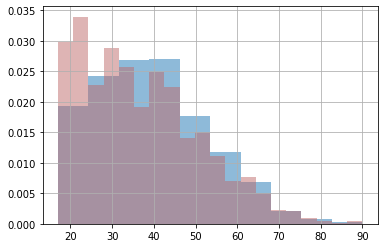

In [107]:
#Probability Mass Funciontion (PMF)
#import seaborn as sns 

ml_age.hist(density=True, alpha = .5, histtype = 'stepfilled', bins = 10)

fm_age.hist(density=True, alpha = .5, histtype = 'stepfilled', bins = 20, 
            color = sns.desaturate("indianred", .75))


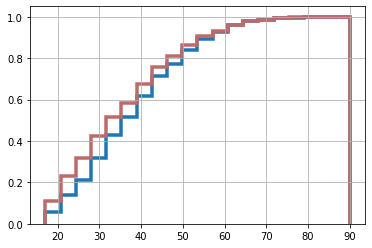

In [108]:
#Cumulative Distribution Function CDF

ml_age.hist(density=True, histtype = 'step', cumulative = True, linewidth = 3.5, 
            bins = 20) 

fm_age.hist(density=True, histtype='step', cumulative = True, linewidth = 3.5, 
            bins = 20, color = sns.desaturate("indianred",.75))

In [109]:
#Outliers -> Retirar maior que 72 e menor que 22 anos


#Remoção dos Outliers
df2 = df.drop(df.index[(df.income == '>50K\n') & 
                       (df['age'] > df['age'].median() + 35) & 
                       (df['age'] > df['age'].median() - 15)])

ml1_age = ml1['age']
fm1_age = fm1['age']

#Homens da base removidos os outliers
ml2_age = ml1_age.drop( ml1_age.index[ (ml1_age > df['age'].median() + 35) 
                            & (ml1_age > df['age'].median() - 15) ])
#Mulhes da base removidos os outliers
fm2_age = fm1_age.drop( fm1_age.index[ (fm1_age > df['age'].median() + 35) 
                            & (fm1_age > df['age'].median() - 15) ])


In [110]:
#Estatisticas sem os Outliers

#Homens
mu2ml = ml2_age.mean() 
std2ml = ml2_age.std() 
md2ml = ml2_age.median() 

#Mulheres
mu2fm = fm2_age.mean() 
std2fm = fm2_age.std() 
md2fm = fm2_age.median()

print ("Men statistics:", "Mean:", mu2ml, "Std:", std2ml,"Median:", md2ml,
       "Min:", ml2_age.min(), "Max:", ml2_age.max())

print ("Women statistics:","Mean:", mu2fm, "Std:", std2fm,"Median:", md2fm,

       "Min:", fm2_age.min(), "Max:", fm2_age.max())

Men statistics: Mean: 44.317982123920615 Std: 10.019749857171412 Median: 44.0 Min: 19 Max: 72
Women statistics: Mean: 41.877028181041844 Std: 10.036441807343714 Median: 41.0 Min: 19 Max: 72


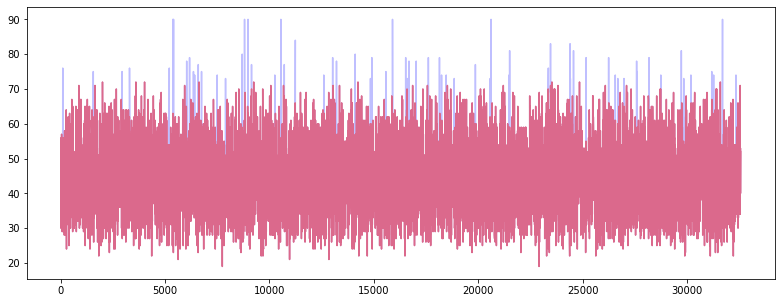

In [111]:
from matplotlib import pyplot as plt

plt.figure(figsize = (13.4, 5)) 

#Grafico com todos os dados
df.age[(df.income == '>50K\n')].plot(alpha = .25, color = 'blue') 

#Grafico com a remocão dos Outliers
df2.age[(df2.income == '>50K\n')].plot(alpha = .45, color = 'red')

In [112]:
#Diferenças da Médias de idade entre Homens e Mulheres

#Com Outliers
print ('The mean difference with outliers is: %4.2f. '% (ml_age.mean() - fm_age.mean()))
#Sem Outliers
print ('The mean difference without outliers is: %4.2f.'% (ml2_age.mean() - fm2_age.mean()))

The mean difference with outliers is: 2.58. 
The mean difference without outliers is: 2.44.


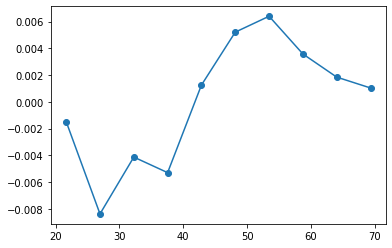

In [113]:
from matplotlib import pyplot as plt
import numpy as np

#Diferença nos salários dos Homens e Mulheres
countx, divisionx = np.histogram(ml2_age, density=True)
county, divisiony = np.histogram(fm2_age, density=True)
val = [(divisionx[i] + divisionx[i+1])/2 for i in range(len(divisionx) - 1)]
plt.plot(val, countx - county, 'o-')


In [114]:
#Distorção(Skewness) ##ASSIMETRIA

def skewness(x):
  res = 0
  m = x.mean()
  s = x.std()
  for i in x:
    res += (i-m) * (i-m) * (i-m)
  res /= (len(x) * s * s * s)
  return res

print ("Skewness of the male population = ", skewness(ml2_age))
print ("Skewness of the female population is = ", skewness(fm2_age))



Skewness of the male population =  0.2664443838432819
Skewness of the female population is =  0.38633352491285977


In [115]:
#Pearson’s median skewness coefficient ## COEFICIENTE DE PERSON

def pearson(x): 
  return 3 * (x.mean() - x.median()) * x.std()

print ("Pearson’s coefficient of the male population = ", pearson(ml2_age))
print ("Pearson’s coefficient of the female population = ", pearson(fm2_age))

Pearson’s coefficient of the male population =  9.55830402220993
Pearson’s coefficient of the female population =  26.40672690728092
